In [ ]:
import pandas as pd


In [ ]:
df_dict = pd.read_excel("user-profiles.xlsx", sheet_name = [0, 1, 2])

In [ ]:
print(df_dict[0])

                  WorkerId       gender      age              race  \
0    A002160837SWJFPIAI7L7  man          22 - 30  Black              
1    A106MX66IVHW6T         man          30 - 45  White              
2    A11FFJZ0C984W4         woman        22 - 30  White              
3    A12EO8AAUDZIU8         man          22 - 30  Latino/Hispanic    
4    A14BSOU2Y5JNT0         man          22 - 30  Asian              
5    A14GKRTUEHBLBZ         woman        30 - 45  White              
6    A14KDNZSWDFIE7         man          22 - 30  Black              
7    A17AF42SNQNH9C         man          45.0     White              
8    A17TKHT8FEVH0R         man          22 - 30  Asian              
9    A183WYXN12P2TJ         man          30 - 45  White              
10   A18H3EK547GHD4         man          30 - 45  White              
11   A19AJ97UOOALX          woman        30 - 45  White              
12   A1AKL5YH9NLD2V         man          30 - 45  White              
13   A1AZTE5W2MF1TU 

In [ ]:
joined = pd.merge(pd.merge(df_dict[0],df_dict[1], how = 'outer', on = 'WorkerId'), df_dict[2], how = 'outer', on = 'WorkerId')

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [ ]:
joined.iloc[:,1:9].describe()

,gender,age,race,continent,education,marriage,language,religion
count,155,155,155,155,155,155,155,155
unique,4,4,6,6,5,3,3,6
top,man,30 - 45,White,North America,Bachelor's Degree,"Single, never married",English,Other
freq,86,82,108,126,76,80,138,81


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
from matplotlib.pyplot import xticks

Text(0.5, 1.0, 'Correlation between different features')

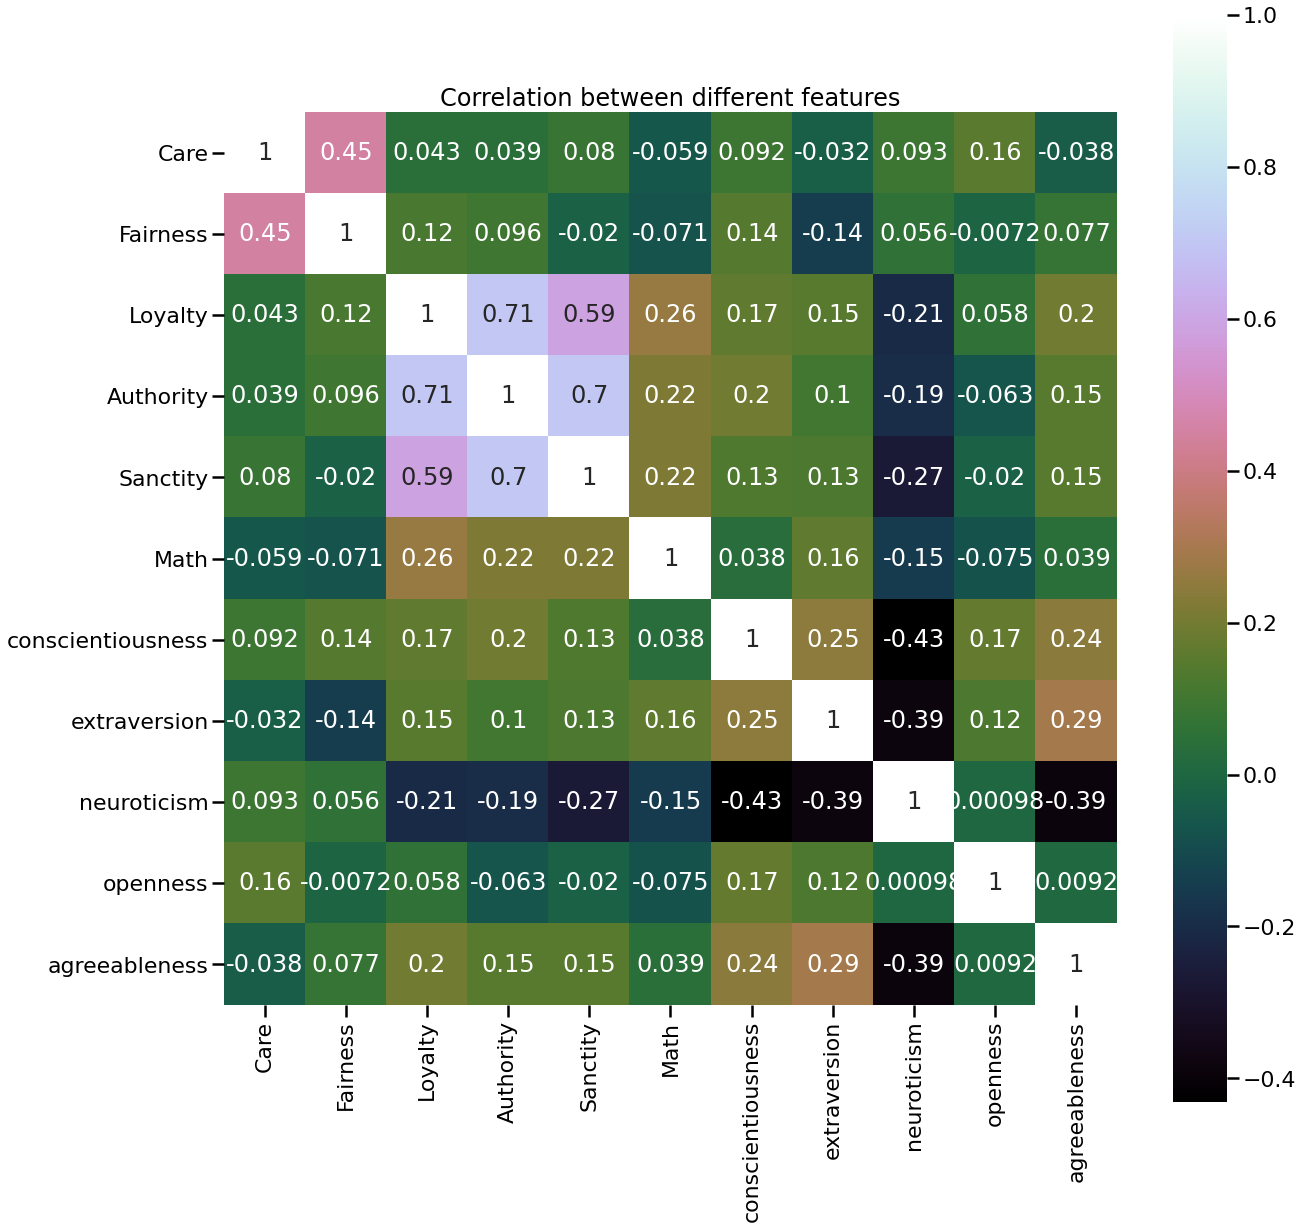

In [ ]:
correlation = joined.iloc[:, 9:].corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between different features')

In [ ]:
joined = joined.drop(columns = ['Math'])

In [ ]:
cols = joined.columns.tolist()
cols = cols[:9] + [cols[14]] + cols[9:14] +cols[15:]
cols

['WorkerId',
 'gender',
 'age',
 'race',
 'continent',
 'education',
 'marriage',
 'language',
 'religion',
 'Political',
 'Care',
 'Fairness',
 'Loyalty',
 'Authority',
 'Sanctity',
 'conscientiousness',
 'extraversion',
 'neuroticism',
 'openness',
 'agreeableness']

In [ ]:
joined = joined[cols].dropna()
joined

,WorkerId,gender,age,race,continent,education,marriage,language,religion,Political,Care,Fairness,Loyalty,Authority,Sanctity,conscientiousness,extraversion,neuroticism,openness,agreeableness
0,A002160837SWJFPIAI7L7,man,22 - 30,Black,North America,Bachelor's Degree,"Single, never married",English,Other,liberal,2.0,5.0,1.0,2.5,3.5,1.5,0.0,1.0,1.5,3.5
1,A106MX66IVHW6T,man,30 - 45,White,North America,Bachelor's Degree,Married or domestic partnership,English,Catholicism/Christianity,moderate liberal,1.0,0.5,0.0,0.0,0.0,3.5,3.0,0.5,3.5,3.0
2,A11FFJZ0C984W4,woman,22 - 30,White,North America,Bachelor's Degree,"Single, never married",English,Other,liberal,4.5,4.5,1.0,1.5,1.5,2.5,0.0,3.5,3.0,1.0
3,A12EO8AAUDZIU8,man,22 - 30,Latino/Hispanic,Central / South America,Bachelor's Degree,"Single, never married",English,Other,liberal,2.0,3.5,3.5,5.0,2.0,3.5,0.5,1.5,2.0,2.5
4,A14BSOU2Y5JNT0,man,22 - 30,Asian,Asia,Master's Degree,"Single, never married",English,Hinduism,moderate conservative,4.5,5.0,3.5,2.0,3.5,3.5,2.0,2.5,2.0,4.0
5,A14GKRTUEHBLBZ,woman,30 - 45,White,North America,Master's Degree,Married or domestic partnership,English,Other,moderate liberal,4.5,5.0,3.0,0.5,1.0,3.0,1.0,3.5,4.0,3.0
6,A14KDNZSWDFIE7,man,22 - 30,Black,North America,Bachelor's Degree,Married or domestic partnership,English,Catholicism/Christianity,liberal,4.5,5.0,2.5,5.0,4.5,3.5,1.5,1.5,2.5,3.5
7,A17AF42SNQNH9C,man,45.0,White,North America,Associate's Degree / Trade School,Divorced,English,Catholicism/Christianity,moderate liberal,4.5,5.0,3.0,3.0,2.5,4.0,2.5,1.0,2.0,3.0
8,A17TKHT8FEVH0R,man,22 - 30,Asian,North America,Associate's Degree / Trade School,"Single, never married",English,Other,liberal,5.0,5.0,1.5,1.5,2.5,1.5,0.0,2.5,2.5,2.0
9,A183WYXN12P2TJ,man,30 - 45,White,North America,Bachelor's Degree,Married or domestic partnership,English,Other,moderate liberal,4.0,4.0,3.5,3.0,3.5,3.0,0.0,2.0,3.0,4.0


In [ ]:
from sklearn import preprocessing
joined_norm = joined.copy()
scaler = preprocessing.MinMaxScaler()
joined_norm.iloc[:, 10:] = scaler.fit_transform(joined_norm.iloc[:, 10:])

In [ ]:
joined_norm['age'] = joined_norm['age'].map(str)
joined_norm = joined_norm.drop(columns = ['WorkerId'])

In [ ]:
joined_norm

,gender,age,race,continent,education,marriage,language,religion,Political,Care,Fairness,Loyalty,Authority,Sanctity,conscientiousness,extraversion,neuroticism,openness,agreeableness
0,man,22 - 30,Black,North America,Bachelor's Degree,"Single, never married",English,Other,liberal,0.4,1.000000,0.2,0.5,0.7,0.375,0.000,0.250,0.375,0.875
1,man,30 - 45,White,North America,Bachelor's Degree,Married or domestic partnership,English,Catholicism/Christianity,moderate liberal,0.2,0.000000,0.0,0.0,0.0,0.875,0.750,0.125,0.875,0.750
2,woman,22 - 30,White,North America,Bachelor's Degree,"Single, never married",English,Other,liberal,0.9,0.888889,0.2,0.3,0.3,0.625,0.000,0.875,0.750,0.250
3,man,22 - 30,Latino/Hispanic,Central / South America,Bachelor's Degree,"Single, never married",English,Other,liberal,0.4,0.666667,0.7,1.0,0.4,0.875,0.125,0.375,0.500,0.625
4,man,22 - 30,Asian,Asia,Master's Degree,"Single, never married",English,Hinduism,moderate conservative,0.9,1.000000,0.7,0.4,0.7,0.875,0.500,0.625,0.500,1.000
5,woman,30 - 45,White,North America,Master's Degree,Married or domestic partnership,English,Other,moderate liberal,0.9,1.000000,0.6,0.1,0.2,0.750,0.250,0.875,1.000,0.750
6,man,22 - 30,Black,North America,Bachelor's Degree,Married or domestic partnership,English,Catholicism/Christianity,liberal,0.9,1.000000,0.5,1.0,0.9,0.875,0.375,0.375,0.625,0.875
7,man,45.0,White,North America,Associate's Degree / Trade School,Divorced,English,Catholicism/Christianity,moderate liberal,0.9,1.000000,0.6,0.6,0.5,1.000,0.625,0.250,0.500,0.750
8,man,22 - 30,Asian,North America,Associate's Degree / Trade School,"Single, never married",English,Other,liberal,1.0,1.000000,0.3,0.3,0.5,0.375,0.000,0.625,0.625,0.500
9,man,30 - 45,White,North America,Bachelor's Degree,Married or domestic partnership,English,Other,moderate liberal,0.8,0.777778,0.7,0.6,0.7,0.750,0.000,0.500,0.750,1.000


KPrototypes

In [ ]:
from kmodes.kprototypes import KPrototypes
n_clusters=24
cost=[]
for i in range(1, n_clusters):
    kproto = KPrototypes(n_clusters=i, init='Cao')
    clusters = kproto.fit_predict(joined_norm, categorical=list(range(0,9)))
    cost.append(kproto.cost_)

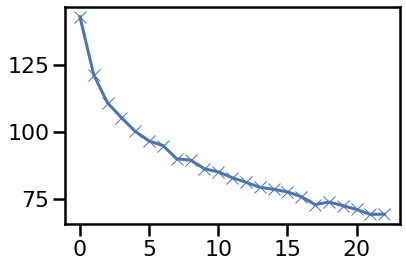

In [ ]:
plt.plot(cost, 'bx-')

In [ ]:
kproto = KPrototypes(n_clusters=7, init='Cao')
clusters = kproto.fit_predict(joined_norm, categorical=list(range(0,9)))
#join data with cluster labels 
labels = pd.DataFrame(clusters)
labeledWorkers = pd.concat((joined.reset_index(),labels),axis=1)
labeledWorkers = labeledWorkers.rename({0:'cluster'},axis=1)

KMeans

In [ ]:
kmean = KMeans(6)
clusters = (kmean.fit(joined_norm.iloc[:,9:])).labels_
#join data with cluster labels 
labels = pd.DataFrame(clusters)
labeledWorkers = pd.concat((joined.reset_index(),labels),axis=1)
labeledWorkers = labeledWorkers.rename({0:'cluster'},axis=1)

In [ ]:
labeledWorkers['age'] = labeledWorkers['age'].map(str)
labeledWorkers = labeledWorkers.drop(columns = ['index'])
labeledWorkers

In [ ]:
# for c in labeledWorkers:
sns.set(rc={'figure.figsize':(11.7,8.27)})

for c in labeledWorkers:
    if c != 'WorkerId' and c != 'cluster': 
        ax = sns.countplot(x=c, hue="cluster", data=labeledWorkers)
        handles, labels = ax.get_legend_handles_labels()
        ax.set_yticks(np.arange(0, 26, 1))
#         for p in ax.patches: 
#             ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
        ax.legend(handles=handles[:7], labels=labels[:7], loc="upper right", title="cluster", prop={'size': 15})
        ax.figure.savefig(c + "_clusters"+".png")
# grid= sns.FacetGrid(labeledWorkers, col='cluster', height = 7, aspect = 3)
# grid.map(plt.hist, 'race')

In [ ]:
labeledWorkers.to_excel("clustered user response data.xlsx")

In [ ]:
cluster_dicts = []
for i in range(7):
    cluster_dicts.append({})
for index, row in labeledWorkers.iterrows():
    idx = row['cluster']
    if row['religion'] not in cluster_dicts[idx]:
        cluster_dicts[idx][row['religion']] = 1
    else:
        cluster_dicts[idx][row['religion']] += 1
cluster_dicts        

[{'Other': 19, 'Catholicism/Christianity': 3, 'Islam': 1},
 {'Catholicism/Christianity': 15, 'Buddhism': 2, 'Other': 2},
 {'Catholicism/Christianity': 10, 'Other': 7, 'Judaism': 1},
 {'Other': 13},
 {'Other': 3, 'Catholicism/Christianity': 7, 'Hinduism': 1},
 {'Other': 23, 'Catholicism/Christianity': 3},
 {'Other': 3, 'Hinduism': 1, 'Catholicism/Christianity': 14, 'Buddhism': 1}]

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(labeledWorkers)
print(pca.explained_variance_ratio_.cumsum())

In [ ]:
from IPython.display import display, HTML
from sklearn.tree import _tree, DecisionTreeClassifier
import pandas as pd

def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

def get_class_rules(tree: DecisionTreeClassifier, feature_names: list):
  inner_tree: _tree.Tree = tree.tree_
  classes = tree.classes_
  class_rules_dict = dict()

  def tree_dfs(node_id=0, current_rule=[]):
    # feature[i] holds the feature to split on, for the internal node i.
    split_feature = inner_tree.feature[node_id]
    if split_feature != _tree.TREE_UNDEFINED: # internal node
      name = feature_names[split_feature]
      threshold = inner_tree.threshold[node_id]
      # left child
      left_rule = current_rule + ["({} <= {})".format(name, threshold)]
      tree_dfs(inner_tree.children_left[node_id], left_rule)
      # right child
      right_rule = current_rule + ["({} > {})".format(name, threshold)]
      tree_dfs(inner_tree.children_right[node_id], right_rule)
    else: # leaf
      dist = inner_tree.value[node_id][0]
      dist = dist/dist.sum()
      max_idx = dist.argmax()
      if len(current_rule) == 0:
        rule_string = "ALL"
      else:
        rule_string = " and ".join(current_rule)
      # register new rule to dictionary
      selected_class = classes[max_idx]
      class_probability = dist[max_idx]
      class_rules = class_rules_dict.get(selected_class, [])
      class_rules.append((rule_string, class_probability))
      class_rules_dict[selected_class] = class_rules
    
  tree_dfs() # start from root, node_id = 0
  return class_rules_dict

def cluster_report(data: pd.DataFrame, clusters, min_samples_leaf=50, pruning_level=0.01):
    # Create Model
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, ccp_alpha=pruning_level)
    tree.fit(data, clusters)
    
    # Generate Report
    feature_names = data.columns
    class_rule_dict = get_class_rules(tree, feature_names)

    report_class_list = []
    for class_name in class_rule_dict.keys():
        rule_list = class_rule_dict[class_name]
        combined_string = ""
        for rule in rule_list:
            combined_string += "[{}] {}\n\n".format(rule[1], rule[0])
        report_class_list.append((class_name, combined_string))
        
    cluster_instance_df = pd.Series(clusters).value_counts().reset_index()
    cluster_instance_df.columns = ['class_name', 'instance_count']
    report_df = pd.DataFrame(report_class_list, columns=['class_name', 'rule_list'])
    report_df = pd.merge(cluster_instance_df, report_df, on='class_name', how='left')
    pretty_print(report_df.sort_values(by='class_name')[['class_name', 'instance_count', 'rule_list']])


In [ ]:
 cluster_report(labeledWorkers.iloc[:, 10:], labeledWorkers['cluster'])

,class_name,instance_count,rule_list
1,0,23,[0.3150684931506849] (cluster <= 3.5)
2,1,19,NaN
4,2,18,NaN
5,3,13,NaN
6,4,11,NaN
0,5,26,[0.4642857142857143] (cluster > 3.5)
3,6,19,NaN


In [ ]:
# def plot_clusters(data, algorithm, args, kwds):
#     start_time = time.time()
#     mini_df = pd.DataFrame(data)[["Care", "extraversion"]].dropna()
#     labels = algorithm(*args, **kwds).fit_predict(mini_df.values)
#     end_time = time.time()
#     palette = sns.color_palette('deep', np.unique(labels).max() + 1)
#     colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
#     plt.figure(figsize=(8, 8), dpi=80)
#     plt.scatter(mini_df["Care"], mini_df["extraversion"], c=colors, alpha = 0.25)
#     frame = plt.gca()
# #     plt.xticks(np.arange(min(x), max(x)+1, 1.0))
#     plt.title('Clusters Found ({})'.format(str(algorithm.__name__)), fontsize=20)
# #     plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

In [ ]:
labeledWorkers = pd.read_excel("clustered user response data.xlsx", sheet_name = 0, index_col=0)

In [ ]:
labeledWorkers

,WorkerId,gender,age,race,continent,education,marriage,language,religion,Care,...,Loyalty,Authority,Sanctity,Political,conscientiousness,extraversion,neuroticism,openness,agreeableness,cluster
0,A002160837SWJFPIAI7L7,man,22 - 30,Black,North America,Bachelor's Degree,"Single, never married",English,Other,2.0,...,1.0,2.5,3.5,liberal,1.5,0.0,1.0,1.5,3.5,6
1,A106MX66IVHW6T,man,30 - 45,White,North America,Bachelor's Degree,Married or domestic partnership,English,Catholicism/Christianity,1.0,...,0.0,0.0,0.0,moderate liberal,3.5,3.0,0.5,3.5,3.0,2
2,A11FFJZ0C984W4,woman,22 - 30,White,North America,Bachelor's Degree,"Single, never married",English,Other,4.5,...,1.0,1.5,1.5,liberal,2.5,0.0,3.5,3.0,1.0,5
3,A12EO8AAUDZIU8,man,22 - 30,Latino/Hispanic,Central / South America,Bachelor's Degree,"Single, never married",English,Other,2.0,...,3.5,5.0,2.0,liberal,3.5,0.5,1.5,2.0,2.5,6
4,A14BSOU2Y5JNT0,man,22 - 30,Asian,Asia,Master's Degree,"Single, never married",English,Hinduism,4.5,...,3.5,2.0,3.5,moderate conservative,3.5,2.0,2.5,2.0,4.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,AT0COJ1G23ZB0,woman,30 - 45,White,North America,Master's Degree,Married or domestic partnership,English,Other,4.0,...,1.5,2.0,1.0,liberal,3.5,1.0,2.5,3.5,2.5,3
125,ATZMN4TLYB94G,woman,30 - 45,White,Australia,Associate's Degree / Trade School,"Single, never married",English,Catholicism/Christianity,3.0,...,1.5,1.5,1.0,liberal,3.5,0.5,3.0,2.5,3.0,5
126,AU5JP4ALJ9JA2,woman,45,White,North America,Bachelor's Degree,Married or domestic partnership,English,Other,3.5,...,1.5,0.5,2.5,liberal,2.0,0.5,3.0,3.5,3.0,3
127,AV22FQTJNBUZT,woman,30 - 45,White,North America,Bachelor's Degree,"Single, never married",English,Other,4.5,...,1.5,2.5,4.0,liberal,4.0,3.0,0.0,3.0,4.0,2


In [ ]:
full_data = labeledWorkers.iloc[:, 1:-1]
full_data

,gender,age,race,continent,education,marriage,language,religion,Care,Fairness,Loyalty,Authority,Sanctity,Political,conscientiousness,extraversion,neuroticism,openness,agreeableness
0,man,22 - 30,Black,North America,Bachelor's Degree,"Single, never married",English,Other,2.0,5.0,1.0,2.5,3.5,liberal,1.5,0.0,1.0,1.5,3.5
1,man,30 - 45,White,North America,Bachelor's Degree,Married or domestic partnership,English,Catholicism/Christianity,1.0,0.5,0.0,0.0,0.0,moderate liberal,3.5,3.0,0.5,3.5,3.0
2,woman,22 - 30,White,North America,Bachelor's Degree,"Single, never married",English,Other,4.5,4.5,1.0,1.5,1.5,liberal,2.5,0.0,3.5,3.0,1.0
3,man,22 - 30,Latino/Hispanic,Central / South America,Bachelor's Degree,"Single, never married",English,Other,2.0,3.5,3.5,5.0,2.0,liberal,3.5,0.5,1.5,2.0,2.5
4,man,22 - 30,Asian,Asia,Master's Degree,"Single, never married",English,Hinduism,4.5,5.0,3.5,2.0,3.5,moderate conservative,3.5,2.0,2.5,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,woman,30 - 45,White,North America,Master's Degree,Married or domestic partnership,English,Other,4.0,5.0,1.5,2.0,1.0,liberal,3.5,1.0,2.5,3.5,2.5
125,woman,30 - 45,White,Australia,Associate's Degree / Trade School,"Single, never married",English,Catholicism/Christianity,3.0,4.0,1.5,1.5,1.0,liberal,3.5,0.5,3.0,2.5,3.0
126,woman,45,White,North America,Bachelor's Degree,Married or domestic partnership,English,Other,3.5,4.5,1.5,0.5,2.5,liberal,2.0,0.5,3.0,3.5,3.0
127,woman,30 - 45,White,North America,Bachelor's Degree,"Single, never married",English,Other,4.5,3.0,1.5,2.5,4.0,liberal,4.0,3.0,0.0,3.0,4.0


In [ ]:
from sklearn.preprocessing import PowerTransformer
!pip install umap-learn
import umap

     |████████████████████████████████| 88 kB 4.9 MB/s 
     |████████████████████████████████| 1.1 MB 35.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=fa8d50fd0c87adef9ab044cd16e9dd5ea7e8a05ab9153df067775d6e4308b35b
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=548e61d6a91e211b45f6b0d9c9a6800f0ae4930747603fd3336ea2e2a962c676
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

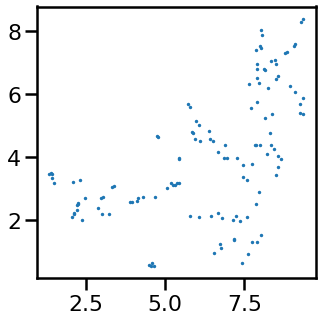

In [ ]:
#Preprocessing numerical
numerical = full_data.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = full_data.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(full_data.select_dtypes(include='object').columns) / full_data.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.umap_.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.umap_.reset_local_connectivity(intersection)
embedding = umap.umap_.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                fit1._initial_alpha, fit1._a, fit1._b, 
                                                fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                200, 'random', np.random, fit1.metric, 
                                                fit1._metric_kwds, False, densmap_kwds = {}, output_dens = False)

embedding = embedding[0]
plt.figure(figsize=(5, 5))
plt.scatter(*embedding.T, s=2, cmap='Spectral', alpha=1.0)
plt.show()

In [ ]:
clusters = labeledWorkers.iloc[:,-1]
clusters

0      6
1      2
2      5
3      6
4      6
      ..
124    3
125    5
126    3
127    2
128    6
Name: cluster, Length: 129, dtype: int64

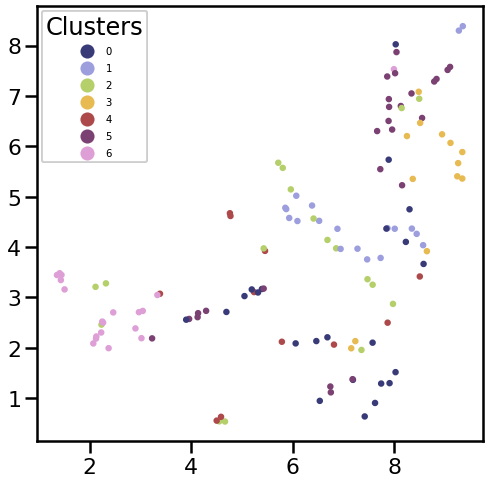

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches((8, 8))
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], s=20, c=clusters, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(num=7),
                    loc="upper left", title="Clusters", prop={'size': 10})
ax.add_artist(legend1)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
lgbm_data = full_data.copy()
for c in lgbm_data.select_dtypes(include='object'):
    lgbm_data[c] = lgbm_data[c].astype('category')
clf_kp = LGBMClassifier(colsample_bytree=0.8)

In [ ]:
clusters

0      6
1      2
2      5
3      6
4      6
5      3
6      6
7      1
8      5
9      4
10     2
11     3
12     0
13     5
14     2
15     1
16     0
17     1
18     4
19     6
20     1
21     6
22     2
23     0
24     4
25     0
26     0
27     5
28     4
29     6
30     5
31     4
32     4
33     0
34     0
35     3
36     0
37     2
38     2
39     1
40     6
41     5
42     3
43     1
44     5
45     1
46     3
47     0
48     0
49     3
50     0
51     5
52     4
53     2
54     1
55     3
56     4
57     6
58     5
59     5
60     5
61     2
62     6
63     2
64     2
65     6
66     1
67     0
68     6
69     5
70     1
71     1
72     0
73     2
74     0
75     5
76     0
77     5
78     4
79     1
80     2
81     4
82     1
83     2
84     2
85     0
86     0
87     2
88     0
89     5
90     2
91     6
92     5
93     0
94     1
95     5
96     3
97     5
98     5
99     0
100    6
101    6
102    6
103    6
104    3
105    5
106    0
107    1
108    1
109    5
110    1
1

In [ ]:
cv_scores_kp = cross_val_score(clf_kp, lgbm_data, clusters, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_kp)}')

CV F1 score for K-Prototypes clusters is 0.6488665556665556


In [ ]:
print(cv_scores_kp)

[0.60128205 0.6482906  0.68857809 0.73058608 0.57559596]


In [ ]:
lgbm_data

,gender,age,race,continent,education,marriage,language,religion,Care,Fairness,Loyalty,Authority,Sanctity,Political,conscientiousness,extraversion,neuroticism,openness,agreeableness
0,man,22 - 30,Black,North America,Bachelor's Degree,"Single, never married",English,Other,2.0,5.0,1.0,2.5,3.5,liberal,1.5,0.0,1.0,1.5,3.5
1,man,30 - 45,White,North America,Bachelor's Degree,Married or domestic partnership,English,Catholicism/Christianity,1.0,0.5,0.0,0.0,0.0,moderate liberal,3.5,3.0,0.5,3.5,3.0
2,woman,22 - 30,White,North America,Bachelor's Degree,"Single, never married",English,Other,4.5,4.5,1.0,1.5,1.5,liberal,2.5,0.0,3.5,3.0,1.0
3,man,22 - 30,Latino/Hispanic,Central / South America,Bachelor's Degree,"Single, never married",English,Other,2.0,3.5,3.5,5.0,2.0,liberal,3.5,0.5,1.5,2.0,2.5
4,man,22 - 30,Asian,Asia,Master's Degree,"Single, never married",English,Hinduism,4.5,5.0,3.5,2.0,3.5,moderate conservative,3.5,2.0,2.5,2.0,4.0
5,woman,30 - 45,White,North America,Master's Degree,Married or domestic partnership,English,Other,4.5,5.0,3.0,0.5,1.0,moderate liberal,3.0,1.0,3.5,4.0,3.0
6,man,22 - 30,Black,North America,Bachelor's Degree,Married or domestic partnership,English,Catholicism/Christianity,4.5,5.0,2.5,5.0,4.5,liberal,3.5,1.5,1.5,2.5,3.5
7,man,45,White,North America,Associate's Degree / Trade School,Divorced,English,Catholicism/Christianity,4.5,5.0,3.0,3.0,2.5,moderate liberal,4.0,2.5,1.0,2.0,3.0
8,man,22 - 30,Asian,North America,Associate's Degree / Trade School,"Single, never married",English,Other,5.0,5.0,1.5,1.5,2.5,liberal,1.5,0.0,2.5,2.5,2.0
9,man,30 - 45,White,North America,Bachelor's Degree,Married or domestic partnership,English,Other,4.0,4.0,3.5,3.0,3.5,moderate liberal,3.0,0.0,2.0,3.0,4.0


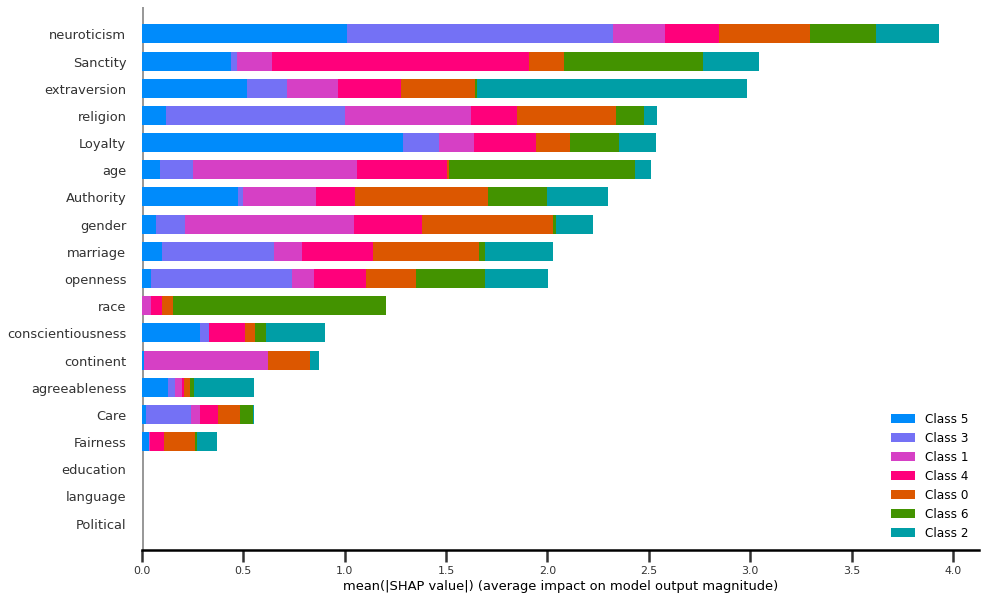

In [ ]:
!pip install shap
import shap
clf_kp.fit(lgbm_data, clusters)
explainer_kp = shap.TreeExplainer(clf_kp)
shap_values_kp = explainer_kp.shap_values(lgbm_data)
shap.summary_plot(shap_values_kp, lgbm_data, plot_size=(15, 10))

invalid value encountered in true_divide
invalid value encountered in true_divide


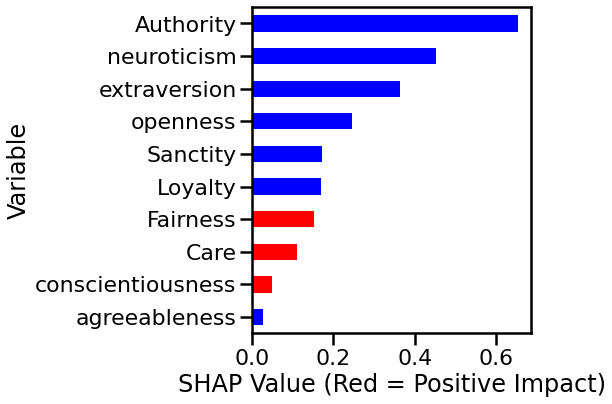

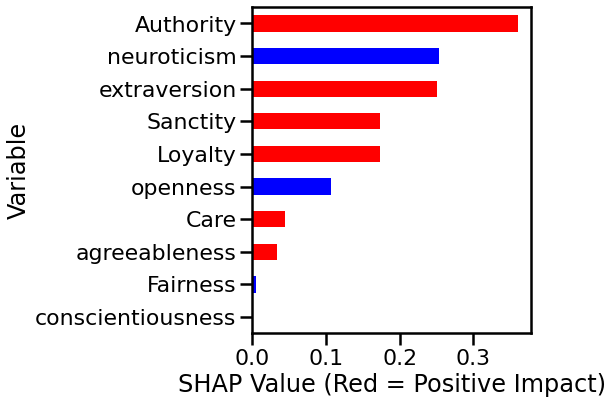

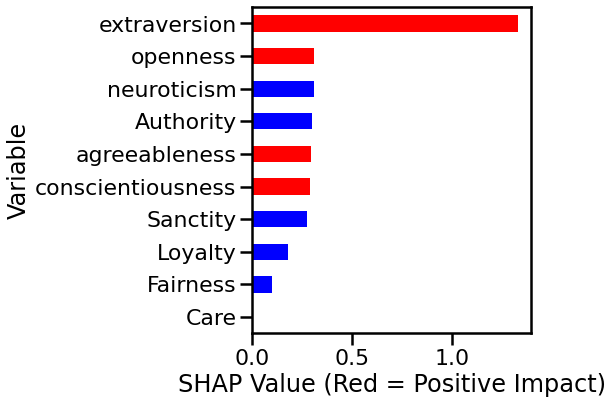

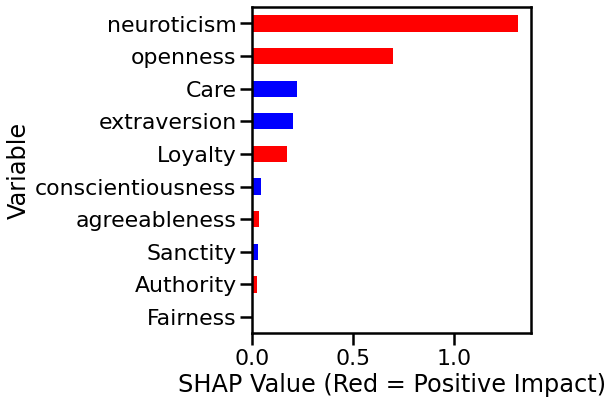

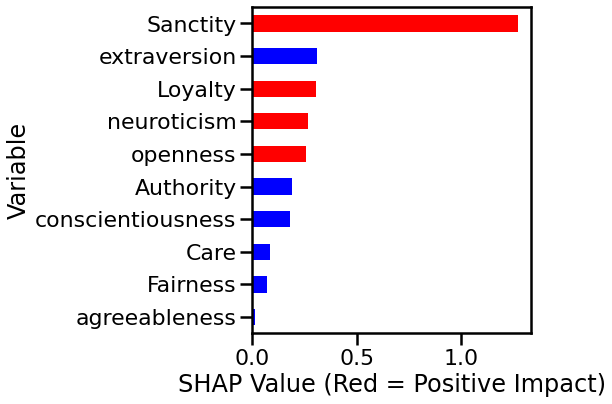

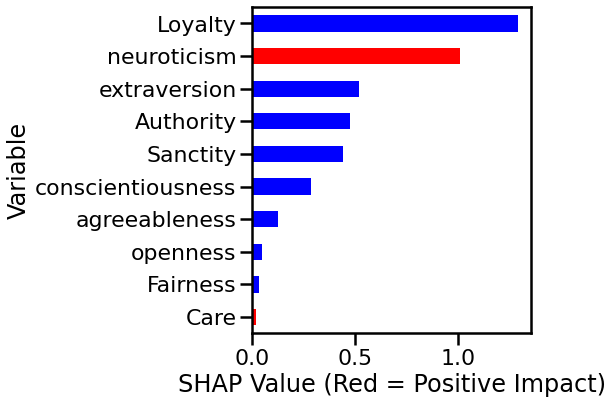

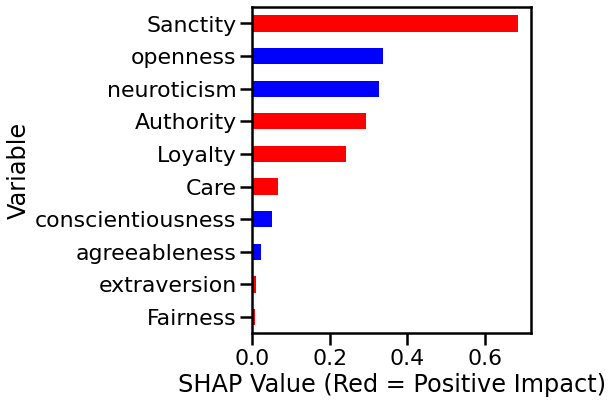

In [ ]:
def ABS_SHAP(cluster_num, df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    ax.figure.savefig('feature_shap_cluster_'+str(cluster_num)+'.png')
for i in range(7):
  ABS_SHAP(i, np.concatenate((shap_values_kp[i][:, 8:13], shap_values_kp[i][:, 14:]), axis = 1), pd.concat([lgbm_data.iloc[:, 8:13], lgbm_data.iloc[:, 14:]], axis = 1)) 

CLUSTER 0: low authority, low neuroticism, low extraversion \
CLUSTER 1: high authority, low neuroticism, high extraversion \
CLUSTER 2: high extraversion,  \
CLUSTER 3: high neuroticism, high openness \
CLUSTER 4: high sanctity \
CLUSTER 5: low loyalty, high neuroticism\
CLUSTER 6: high sanctity, low openness

In [ ]:
corpus_list = ["science pretty female South attractive", "dog money smart hand bodyparts", "person school school bodyparts neck", "computer hospital thearter science spaceship", "animal injection animal hospital animal"]

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# obtain TF-IDF values for each word in each document
tfidf = vectorizer.fit_transform(corpus_list)
features = vectorizer.get_feature_names()

# present vectorized text 
pd.DataFrame(tfidf.toarray(), columns=features, index = ['HIT '+str(i) for i in range(1,6)])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,animal,attractive,bodyparts,computer,dog,female,hand,hospital,injection,money,neck,person,pretty,school,science,smart,south,spaceship,thearter
HIT 1,0.000000,0.463693,0.000000,0.00000,0.000000,0.463693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.463693,0.000000,0.374105,0.000000,0.463693,0.00000,0.00000
HIT 2,0.000000,0.000000,0.374105,0.00000,0.463693,0.000000,0.463693,0.000000,0.000000,0.463693,0.000000,0.000000,0.000000,0.000000,0.000000,0.463693,0.000000,0.00000,0.00000
HIT 3,0.000000,0.000000,0.312840,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.387757,0.387757,0.000000,0.775513,0.000000,0.000000,0.000000,0.00000,0.00000
HIT 4,0.000000,0.000000,0.000000,0.48214,0.000000,0.000000,0.000000,0.388988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.388988,0.000000,0.000000,0.48214,0.48214
HIT 5,0.919238,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.247212,0.306413,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000


In [ ]:
print(features)

['animal', 'attractive', 'bodyparts', 'computer', 'dog', 'female', 'hand', 'hospital', 'injection', 'money', 'neck', 'person', 'pretty', 'school', 'science', 'smart', 'south', 'spaceship', 'thearter']


In [ ]:
labeledWorkers = pd.read_excel("clustered user response data.xlsx", sheet_name = 0, index_col=0)
board_pilot = pd.read_csv("board_pilot1.csv")

In [ ]:
board_pilot = board_pilot[["HITId", "WorkerId", "Answer.clue", "Answer.target_1", "Answer.target_2", "Answer.target_3", "Answer.target_4", "Answer.target_5"]]

In [ ]:
board_pilot

In [ ]:
personality_clue_cluster = pd.merge(board_pilot, labeledWorkers, how = 'inner', on = 'WorkerId')

In [ ]:
clue_cluster = personality_clue_cluster[["HITId","WorkerId", "Answer.clue", "Answer.target_1", "Answer.target_2", "Answer.target_3", "Answer.target_4", "Answer.target_5", "cluster"]]

In [ ]:
clue_cluster = clue_cluster.sort_values('HITId')

In [ ]:
clue_cluster = clue_cluster.reset_index()

In [ ]:
clue_cluster = clue_cluster.drop(columns = ['index'])

In [ ]:
clue_cluster

,HITId,WorkerId,Answer.clue,Answer.target_1,Answer.target_2,Answer.target_3,Answer.target_4,Answer.target_5,cluster
0,30U1YOGZHGN4EKSCVM6PHY2WHUPSDB,A2ZT2Z0LQ05EGZ,money,pound,millionaire,NaN,NaN,NaN,6
1,30U1YOGZHGN4EKSCVM6PHY2WHUPSDB,A1FA3QRISJ1RIP,dog,POUND,TAIL,NaN,NaN,NaN,0
2,30U1YOGZHGN4EKSCVM6PHY2WHUPSDB,AHXHM1PQTRWIQ,bodyparts,THUMB,TAIL,NaN,NaN,NaN,4
3,30U1YOGZHGN4EKSCVM6PHY2WHUPSDB,AKQAI78JTXXC9,smart,millionaire,plot,NaN,NaN,NaN,0
4,30U1YOGZHGN4EKSCVM6PHY2WHUPSDB,AZCGF2D7QIO10,Hand,Thumb,Racket,Bottle,Berry,String,6
5,39O0SQZVKTYCWWRPPK3YRWN49H47RA,A31A1PVXLJBISZ,Injection,Poison,doctor,pants,NaN,NaN,6
6,39O0SQZVKTYCWWRPPK3YRWN49H47RA,A2Y2AZ8DBFU47Q,HOSPITAL,DOCTOR,POISON,PANTS,NaN,NaN,6
7,39O0SQZVKTYCWWRPPK3YRWN49H47RA,A2ZT2Z0LQ05EGZ,animal,calf,centaur,shark,NaN,NaN,6
8,39O0SQZVKTYCWWRPPK3YRWN49H47RA,AKQAI78JTXXC9,animal,calf,shark,centaur,NaN,NaN,0
9,39O0SQZVKTYCWWRPPK3YRWN49H47RA,AZCGF2D7QIO10,Animal,Shark,Calf,Centaur,NaN,NaN,6


In [ ]:
clue_cluster.iloc[5:10, :]

,HITId,WorkerId,Answer.clue,Answer.target_1,Answer.target_2,Answer.target_3,Answer.target_4,Answer.target_5,cluster
5,39O0SQZVKTYCWWRPPK3YRWN49H47RA,A31A1PVXLJBISZ,Injection,Poison,doctor,pants,NaN,NaN,6
6,39O0SQZVKTYCWWRPPK3YRWN49H47RA,A2Y2AZ8DBFU47Q,HOSPITAL,DOCTOR,POISON,PANTS,NaN,NaN,6
7,39O0SQZVKTYCWWRPPK3YRWN49H47RA,A2ZT2Z0LQ05EGZ,animal,calf,centaur,shark,NaN,NaN,6
8,39O0SQZVKTYCWWRPPK3YRWN49H47RA,AKQAI78JTXXC9,animal,calf,shark,centaur,NaN,NaN,0
9,39O0SQZVKTYCWWRPPK3YRWN49H47RA,AZCGF2D7QIO10,Animal,Shark,Calf,Centaur,NaN,NaN,6


In [ ]:
dict_cluster_clues = {}
for index, row in clue_cluster.iloc[5:10, :].iterrows():

    if row["cluster"] not in dict_cluster_clues:
      dict_cluster_clues[row['cluster']] = ""
    
    for i in range(1,6):
      if pd.isna(row['Answer.target_'+str(i)]):
        break
      dict_cluster_clues[row['cluster']] += row['Answer.target_'+str(i)].lower() + " "

In [ ]:
print(dict_cluster_clues)
corpus_list = list(dict_cluster_clues.values())
print(corpus_list)

{6: 'poison doctor pants doctor poison pants calf centaur shark shark calf centaur ', 0: 'calf shark centaur '}
['poison doctor pants doctor poison pants calf centaur shark shark calf centaur ', 'calf shark centaur ']


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# obtain TF-IDF values for each word in each document
tfidf = vectorizer.fit_transform(corpus_list)
features = vectorizer.get_feature_names()

# present vectorized text 
pd.DataFrame(tfidf.toarray(), columns=features, index = ['cluster 6', "cluster 0"])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,calf,centaur,doctor,pants,poison,shark
cluster 6,0.334712,0.334712,0.470426,0.470426,0.470426,0.334712
cluster 0,0.577350,0.577350,0.000000,0.000000,0.000000,0.577350
